In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.shape

(381, 13)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
## If we are going to make a model we need to remove all personal information then and only keep the relevant data matter as of fact... 
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Thinking of Imputing The Empty Values Using Knn-Impute but it might take a bit of work atm

In [9]:
## Drop the Na values

data.dropna(inplace = True)

In [10]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [12]:
data.duplicated().sum()

0

In [13]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

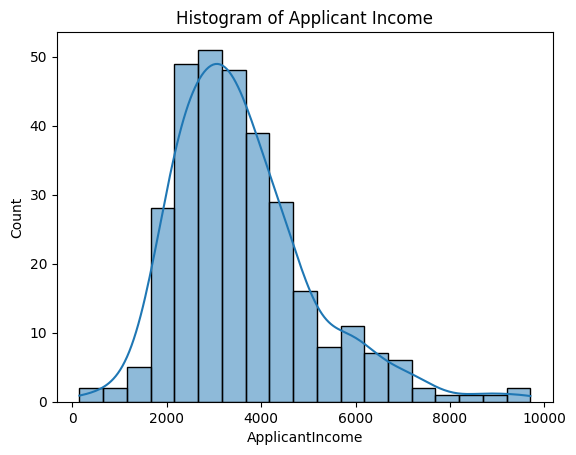

In [14]:
## Create some data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['ApplicantIncome'],kde = True)
plt.title("Histogram of Applicant Income")
plt.show()

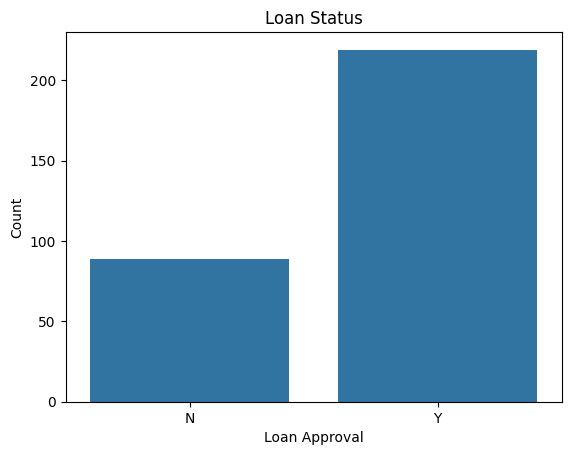

In [15]:
sns.countplot(x = "Loan_Status",data = data)
plt.title("Loan Status")
plt.ylabel("Count")
plt.xlabel("Loan Approval")
plt.show()

In [16]:
avg_loan_amount_by_education = data.groupby("Education")["LoanAmount"].mean().reset_index()
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


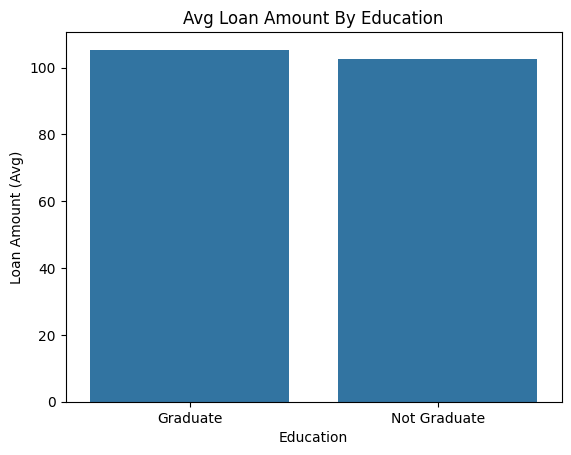

In [17]:
sns.barplot(x= "Education",y = "LoanAmount",data = avg_loan_amount_by_education)
plt.title("Avg Loan Amount By Education")
plt.xlabel("Education")
plt.ylabel("Loan Amount (Avg)")
plt.show()

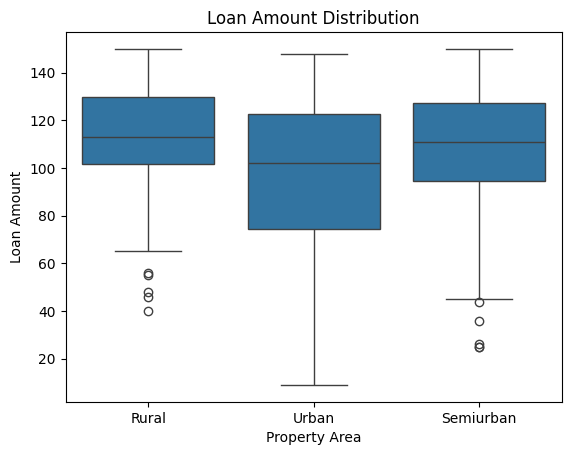

In [18]:
# Use boxplot for categorical distribution
sns.boxplot(x = "Property_Area",y = "LoanAmount",data = data)
plt.title("Loan Amount Distribution")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

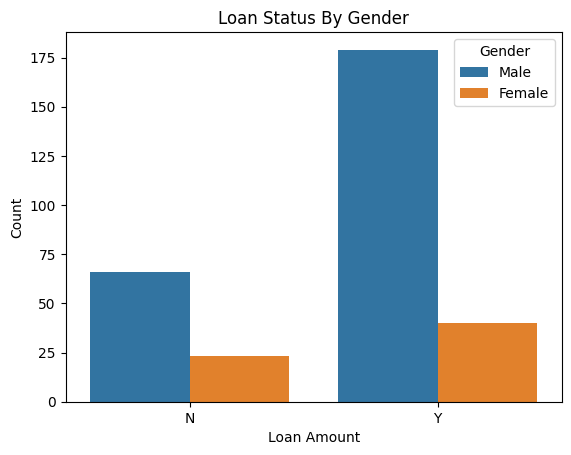

In [19]:
# See the loan status by gender..
sns.countplot(x = "Loan_Status",hue = "Gender",data = data)
plt.title('Loan Status By Gender')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

In [20]:
loan_status_by_married = data.groupby('Loan_Status')['Married'].value_counts().unstack()
loan_status_by_married

Married,No,Yes
Loan_Status,,
N,44,45
Y,79,140


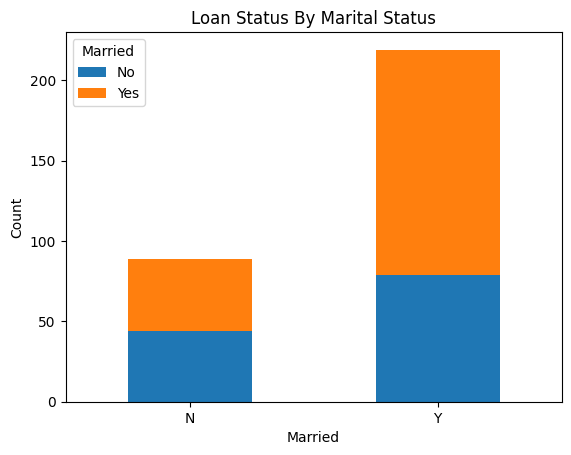

In [21]:
loan_status_by_married.plot(kind = 'bar',stacked = True)
plt.title("Loan Status By Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

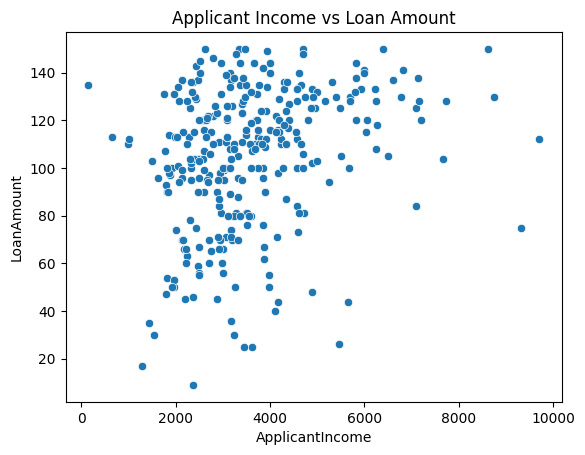

In [22]:
# Take a look at Applicant_Income and Loan Amount

sns.scatterplot(x = "ApplicantIncome",y = "LoanAmount",data = data)
plt.title("Applicant Income vs Loan Amount")
plt.show()

In [23]:
# We can take a look at our numeric_df 

numeric_df = data.select_dtypes(include = ["int64","float64"])
numeric_df


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [24]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


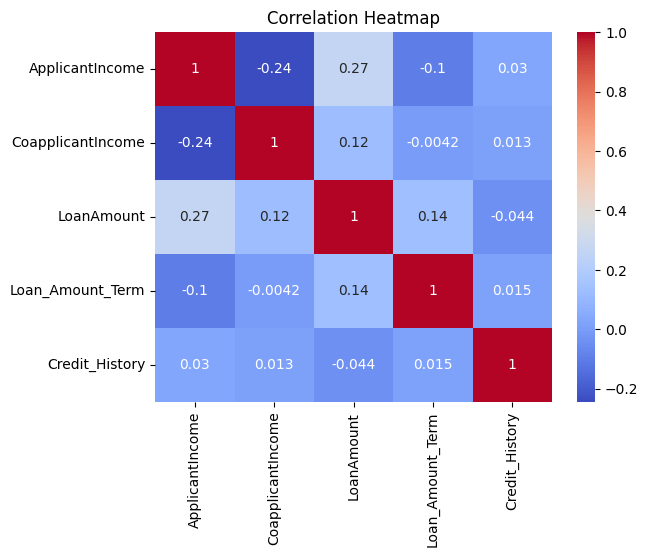

In [25]:
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Let's create some features and make a ML model

In [26]:
X = data[["Married","ApplicantIncome","Education","LoanAmount","Credit_History","CoapplicantIncome"]]

y = data[["Loan_Status"]]

In [27]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()


In [29]:
y["Loan_Status"] = labelencoder.fit_transform(y["Loan_Status"])

C:\Users\Al Haque\AppData\Local\Temp\ipykernel_29556\688273105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Loan_Status"] = labelencoder.fit_transform(y["Loan_Status"])


In [30]:
# Y is 1 and N is 0
y

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [31]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [32]:
# Now we fit_transform the other categorical variables..
X["Married"] = labelencoder.fit_transform(X["Married"])

C:\Users\Al Haque\AppData\Local\Temp\ipykernel_29556\4224852324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"] = labelencoder.fit_transform(X["Married"])


In [33]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History,CoapplicantIncome
0,1,4583,Graduate,128.0,1.0,1508.0
1,1,3000,Graduate,66.0,1.0,0.0
2,1,2583,Not Graduate,120.0,1.0,2358.0
3,0,6000,Graduate,141.0,1.0,0.0
4,1,2333,Not Graduate,95.0,1.0,1516.0
...,...,...,...,...,...,...
376,1,5703,Graduate,128.0,1.0,0.0
377,1,3232,Graduate,108.0,1.0,1950.0
378,0,2900,Graduate,71.0,1.0,0.0
379,1,4106,Graduate,40.0,1.0,0.0


In [34]:
# Now encode the education
X["Education"] = labelencoder.fit_transform(X["Education"])

C:\Users\Al Haque\AppData\Local\Temp\ipykernel_29556\1585435798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = labelencoder.fit_transform(X["Education"])


In [35]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History,CoapplicantIncome
0,1,4583,0,128.0,1.0,1508.0
1,1,3000,0,66.0,1.0,0.0
2,1,2583,1,120.0,1.0,2358.0
3,0,6000,0,141.0,1.0,0.0
4,1,2333,1,95.0,1.0,1516.0
...,...,...,...,...,...,...
376,1,5703,0,128.0,1.0,0.0
377,1,3232,0,108.0,1.0,1950.0
378,0,2900,0,71.0,1.0,0.0
379,1,4106,0,40.0,1.0,0.0


In [36]:
## Now we standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X = scaler.fit_transform(X)

In [38]:
import joblib
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [40]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test,predictions)))
    

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [42]:
log_predictions =  log_model.predict(X_test)

In [43]:
modelperformance(log_predictions)

Accuracy score in model is 0.7941176470588235


In [44]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [2,3,4,5,6,7],
              "weights" : ["uniform","distance"]}
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid= param_grid)
# use values.ravel to get rid of the errors..
gridkn.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [45]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [46]:
knpreds = gridkn.predict(X_test)

In [47]:
modelperformance(knpreds)

Accuracy score in model is 0.7843137254901961


##### Support Vector Classifier 

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC()
param_grid_svc = {"C": [0.001,0.01,0.05,0.1,0.5],"kernel":["linear","rbf","poly"]}

In [50]:
gridsvc = GridSearchCV(svm,param_grid_svc)

In [51]:
gridsvc.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
gridsvc.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [53]:
pred_svc = gridsvc.predict(X_test)
modelperformance(pred_svc)

Accuracy score in model is 0.7941176470588235
